In [11]:
%run /home/sgiorgi/start_notebook.py

Importing FeatureWorker... mif and mm...
pandas as pd... numpy as np... matplotlib as mpl... pyplot as plt... seaborn as sns...
Start sqlalchemy engine for database (or hit Enter for None): fbtrust

Engine initialized with varname 'db_eng'



In [12]:
empInit = '/home/sgiorgi/initFiles/empathy.ini'
fs = FeatureStar.fromFile(empInit)
with open(empInit) as myfile:
    head = [next(myfile).strip() for x in xrange(10)]
print head

['[constants]', 'corpdb = fbtrust', 'corptable = msgs_emp_06_11_16_en', 'correl_field = user_id', 'feattable = feat$1gram$msgs_emp_06_11_16_en$user_id$16to16$0_05$top1k', 'outcometable = emp_user_06_11_16', 'outcomefields = salutogenic_empathy, pathogenic_empathy', 'outcomecontrols = age_adj2, isFemale', 'init = og, fg, rp', 'groupfreqthresh = 500']


In [21]:
# get outcomes and controls
fs.og.group_freq_thresh = 500
outAndCont = fs.og.getGroupsAndOutcomesAsDF()
outAndCont = outAndCont.rename(columns = {'pathogenic_empathy':'path_emp', 'salutogenic_empathy':'sal_emp', 'isFemale':'gender', 'age_adj2':'age'})

Loading Outcomes and Getting Groups for: set(['isFemale', 'age_adj2', 'pathogenic_empathy', 'salutogenic_empathy'])
SQL QUERY: show tables like 'feat$1gram$msgs_emp_06_11_16_en$user_id$16to16'
SQL QUERY: SELECT group_id, sum(value) FROM feat$1gram$msgs_emp_06_11_16_en$user_id$16to16  WHERE  group_id in ('441a05b08a78e661b11e07f64d908af0929a52dc90d6874190d3f5252fe2cfaf','441bc527a7fed5f30088f5b2b4f16bdbe39e6712d1da2e7075c4f96c1ebcf49f','b566e31f83c60aadabe9


In [22]:
outAndCont.head()

,path_emp,sal_emp,age,gender
group_id,,,,
00035fb0dcfbeaa8bb70ffe24d614d4dcee446b803eb4063dccf14dd2a474611,-1.417553,-1.775609,40,0
006d7bda35cb47177d5a3b1beb9de205e5f051a4d621bf610dd7309d85c02779,-0.498223,-0.263617,23,1
00bb3e4d23c98b63308f228f9f6468ac607aece1b532f3b89ba744a867a05c7c,-0.959461,-0.463012,53,1
013975bfda9c6a8c219b514233928c70bcecef7282bfdc6e3246a0a45dbc4a5b,0.275462,0.515861,49,0
014a17de36c6c045b818ba6aa3d70cc31b032bb61731e5a1cc91fa3892302755,-1.538128,-2.945404,37,0


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


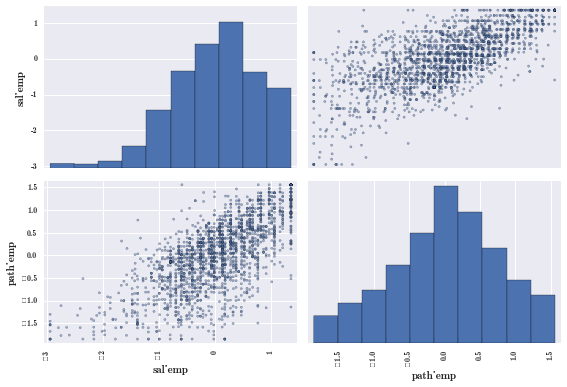

In [23]:
axes = pd.tools.plotting.scatter_matrix(outAndCont[['sal_emp','path_emp']])
plt.tight_layout()

In [24]:
outAndCont.describe()

,path_emp,sal_emp,age,gender
count,1979.000000,1979.000000,1979.000000,1979.000000
mean,0.007808,0.004910,37.893871,0.770591
std,0.769448,0.785351,11.831772,0.420559
min,-1.850325,-2.945404,13.000000,0.000000
25%,-0.486164,-0.504193,29.000000,1.000000
50%,0.037805,0.076656,36.000000,1.000000
75%,0.541641,0.568406,46.000000,1.000000
max,1.557036,1.347305,71.000000,1.000000


array([[<matplotlib.axes.AxesSubplot object at 0x7fbc7a6cb950>,
        <matplotlib.axes.AxesSubplot object at 0x7fbc784d6850>]], dtype=object)

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


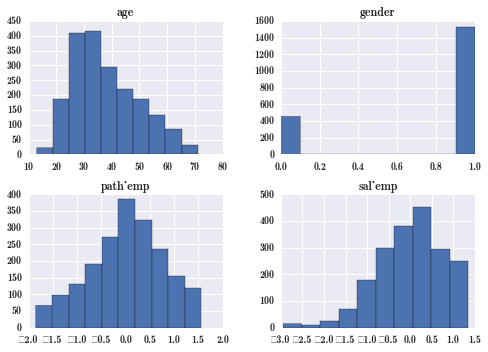

In [25]:
outAndCont.hist()

In [26]:
correls = outAndCont.corr()

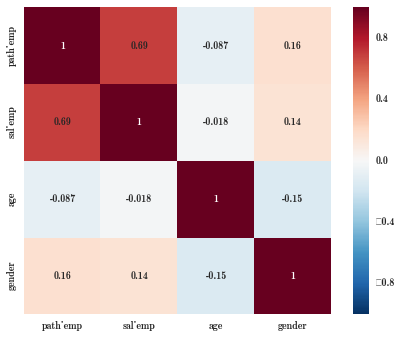

In [27]:
sns.heatmap(correls, annot=True, square=True)

In [28]:
# get feature values
fg_vals = fs.fg.getValuesAsDF()

In [29]:
values = fg_vals.reset_index(level="group_id", drop=True).sum(axis=1).sort_values(axis=0, ascending=False)

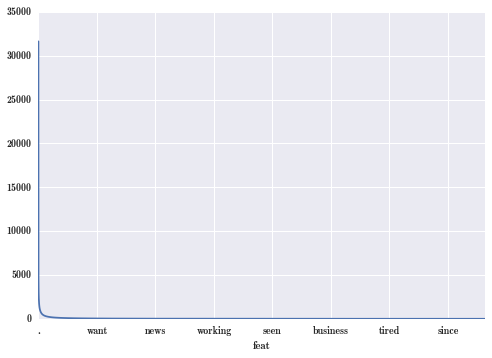

In [30]:
values.plot.line()

In [159]:

scores_ridgecv = fs.rp.testControlCombos(groupFreqThresh = 500, nFolds = 10, allControlsOnly = True, residualizedControls = True)

Loading Outcomes and Getting Groups for: set(['isFemale', 'age_adj2', 'pathogenic_empathy', 'salutogenic_empathy'])
SQL QUERY: show tables like 'feat$1gram$msgs_emp_06_11_16_en$user_id$16to16'
SQL QUERY: SELECT group_id, sum(value) FROM feat$1gram$msgs_emp_06_11_16_en$user_id$16to16  WHERE  group_id in ('441a05b08a78e661b11e07f64d908af0929a52dc90d6874190d3f5252fe2cfaf','441bc527a7fed5f30088f5b2b4f16bdbe39e6712d1da2e7075c4f96c1ebcf49f','b566e31f83c60aadabe9
SQL QUERY: SELECT group_id, feat, group_norm from feat$1gram$msgs_emp_06_11_16_en$user_id$16to16$0_05$top1k WHERE  group_id in ('441bc527a7fed5f30088f5b2b4f16bdbe39e6712d1da2e7075c4f96c1ebcf49f','b566e31f83c60aadabe936babcbcb707e5e6cf9ba3d4cb8a303fc018c1b45ba2','2526
SQL QUERY: select distinct feat from feat$1gram$msgs_emp_06_11_16_en$user_id$16to16$0_05$top1k WHERE  group_id in ('441bc527a7fed5f30088f5b2b4f16bdbe39e6712d1da2e7075c4f96c1ebcf49f','b566e31f83c60aadabe936babcbcb707e5e6cf9ba3d4cb8a303fc018c1b45ba2','2526c7bc1b21a749f

[number of groups: 1979 (10 Folds)]


|COMBO: ()|

= pathogenic_empathy (w/ lang.)=
--------------------------------
Fold 0 
   (feature group: 0): [Initial size: 1979]
[Train size: 1782    Test size: 197]
[Applying StandardScaler to X[0]: StandardScaler(copy=True, with_mean=True, with_std=True)]
 X[0]: (N, features): (1782, 1000)
[Training regression model: ridgecv]
model: RidgeCV(alphas=array([  1.00000e+00,   1.00000e-02,   1.00000e-04,   1.00000e+02,
         1.00000e+04,   1.00000e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False) 
  selected alpha: 10000.000000
  predict: applying standard scaler to X[0]: StandardScaler(copy=True, with_mean=True, with_std=True)
  predict: combined X shape: (197, 1000)
  predict: regression intercept: 0.001587
  *FOLD R^2: 0.0556 (MSE: 0.5699; MAE: 0.6148; mean train mae: 0.6245)
Fold 1 
   (feature group: 0): [Initial size: 1979]
[Train size: 1782    Test size: 197]
[Applying StandardS

In [160]:
print "Model: %s, Feature Selection: %s" % (fs.rp.modelName, fs.rp.featureSelectionString)
for k in scores_ridgecv: 
    for combo in scores_ridgecv[k]:
        print '%s %s r: %s' % (k, combo, scores_ridgecv[k][combo][1]['r'])

Model: ridgecv, Feature Selection: None
pathogenic_empathy ('isFemale', 'age_adj2') r: 0.247755645571
pathogenic_empathy () r: 0.250400574152
salutogenic_empathy ('isFemale', 'age_adj2') r: 0.211938953773
salutogenic_empathy () r: 0.210925059062


In [31]:
fs.rp.modelName = 'ridgefirstpasscv'
fs.rp.featureSelectionString = fwc.DEF_FEATURE_SELECTION_MAPPING['magic_sauce']

In [172]:
scores_ridgefp = fs.rp.testControlCombos(groupFreqThresh = 500, nFolds = 10, comboSizes = [0,2], residualizedControls = True)

Loading Outcomes and Getting Groups for: set(['isFemale', 'age_adj2', 'pathogenic_empathy', 'salutogenic_empathy'])
SQL QUERY: show tables like 'feat$1gram$msgs_emp_06_11_16_en$user_id$16to16'
SQL QUERY: SELECT group_id, sum(value) FROM feat$1gram$msgs_emp_06_11_16_en$user_id$16to16  WHERE  group_id in ('441a05b08a78e661b11e07f64d908af0929a52dc90d6874190d3f5252fe2cfaf','441bc527a7fed5f30088f5b2b4f16bdbe39e6712d1da2e7075c4f96c1ebcf49f','b566e31f83c60aadabe9
SQL QUERY: SELECT group_id, feat, group_norm from feat$1gram$msgs_emp_06_11_16_en$user_id$16to16$0_05$top1k WHERE  group_id in ('441bc527a7fed5f30088f5b2b4f16bdbe39e6712d1da2e7075c4f96c1ebcf49f','b566e31f83c60aadabe936babcbcb707e5e6cf9ba3d4cb8a303fc018c1b45ba2','2526
SQL QUERY: select distinct feat from feat$1gram$msgs_emp_06_11_16_en$user_id$16to16$0_05$top1k WHERE  group_id in ('441bc527a7fed5f30088f5b2b4f16bdbe39e6712d1da2e7075c4f96c1ebcf49f','b566e31f83c60aadabe936babcbcb707e5e6cf9ba3d4cb8a303fc018c1b45ba2','2526c7bc1b21a749f

[number of groups: 1979 (10 Folds)]


|COMBO: ()|

= pathogenic_empathy (w/ lang.)=
--------------------------------
Fold 0 
   (feature group: 0): [Initial size: 1979]
[Train size: 1782    Test size: 197]
[Applying StandardScaler to X[0]: StandardScaler(copy=True, with_mean=True, with_std=True)]
 X[0]: (N, features): (1782, 1000)
[Applying Feature Selection to X: Pipeline(steps=[('1_mean_value_filter', OccurrenceThreshold(threshold=4221)), ('2_univariate_select', SelectFwe(alpha=60.0, score_func=<function f_regression at 0x7f09b0e4f5f0>)), ('3_rpca', RandomizedPCA(copy=True, iterated_power=3, max_components=None,
       n_components=1188, random_state=42, whiten=False))])]
SET THRESHOLD 4221
 after feature selection: (N, features): (1782, 246)
[Training regression model: ridgefirstpasscv]
model: RidgeCV(alphas=array([  1.00000e+00,   1.00000e-02,   1.00000e-04,   1.00000e+02,
         1.00000e+04,   1.00000e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    sc

In [191]:
print "Model: %s, Feature Selection: %s" % (fs.rp.modelName, fs.rp.featureSelectionString)
for k in scores_ridgefp: 
    for combo in scores_ridgefp[k]:
        for i in scores_ridgefp[k][combo]:
            withLang = combo + ("lang",) if i == 1 else combo
            print '%s %s r: %s %s' % (k, withLang, scores_ridgefp[k][combo][i]['r'], i)

Model: ridgefirstpasscv, Feature Selection: Pipeline([("1_mean_value_filter", OccurrenceThreshold(threshold=int(sqrt(X.shape[0]*10000)))), ("2_univariate_select", SelectFwe(f_regression, alpha=60.0)), ("3_rpca", RandomizedPCA(n_components=max(int(X.shape[0]/max(1.5,len(self.featureGetters))), min(50, X.shape[1])), random_state=42, whiten=False, iterated_power=3))])
pathogenic_empathy ('isFemale', 'age_adj2') r: 0.159977918769 0
pathogenic_empathy ('isFemale', 'age_adj2', 'lang') r: 0.223776011633 1
pathogenic_empathy ('lang',) r: 0.228598082541 1
salutogenic_empathy ('isFemale', 'age_adj2') r: 0.131287712238 0
salutogenic_empathy ('isFemale', 'age_adj2', 'lang') r: 0.20524429603 1
salutogenic_empathy ('lang',) r: 0.196878341382 1
